In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Initial Conditions

Here a flow with M1 = 2.81 is deflected by a wedge (wedge angle = 10 deg.)

The shock angle should form at 30 deg. for gamma = 5/3

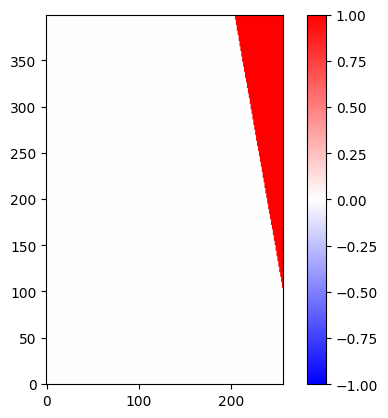

In [312]:
tag = ''
data = np.loadtxt("./output" + tag + "/bound-0.txt")
plt.imshow(data,origin='lower',cmap='bwr',vmin=-1,vmax=1)
plt.colorbar()
bound = data

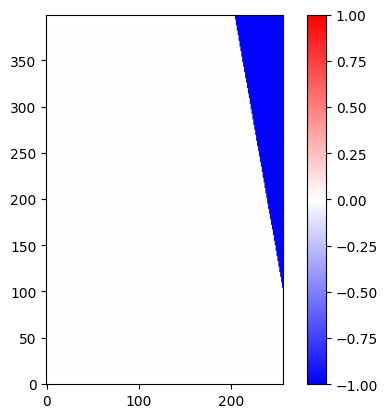

In [313]:
tag = ''
data = np.loadtxt("./output" + tag + "/bnx-0.txt")
plt.imshow(data,origin='lower',cmap='bwr',vmin=-1,vmax=1)
plt.colorbar()
bound = data
# plt.xlim(xmin=250)
# plt.ylim([100,120])

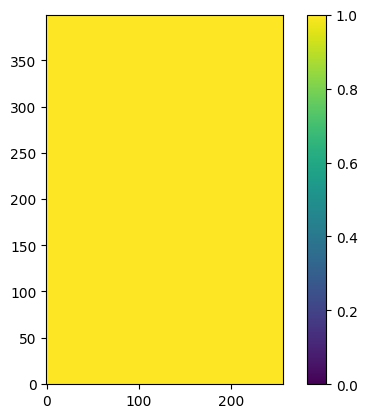

In [314]:
data = np.loadtxt("./output" + tag + "/rho-0.txt")
plt.imshow(data,vmin=0,origin='lower')
plt.colorbar()

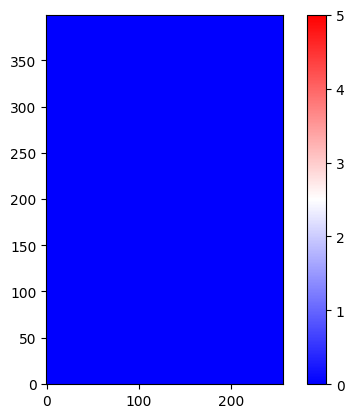

In [315]:
data = np.loadtxt("./output" + tag + "/u-0.txt")
plt.imshow(data,vmin=0,vmax=5,origin='lower',cmap='bwr')
plt.colorbar()

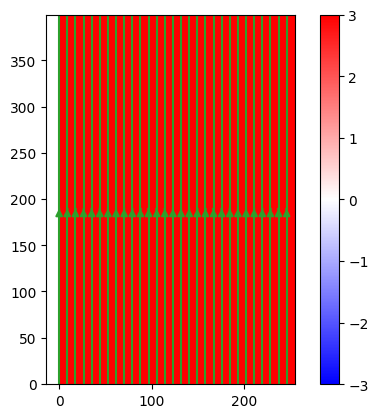

In [316]:
data = np.loadtxt("./output" + tag + "/v-0.txt")
plt.imshow(data,vmin=-3,vmax=3,origin='lower',cmap='bwr')
plt.colorbar()

v = np.loadtxt("./output/v-0.txt")
u = np.loadtxt("./output/u-0.txt")
m,n = u.shape
x, y = np.arange(0,n,1), np.arange(0,m,1)
plt.streamplot(x,y,u,v, density=1.0, color='tab:green')

# Final Output

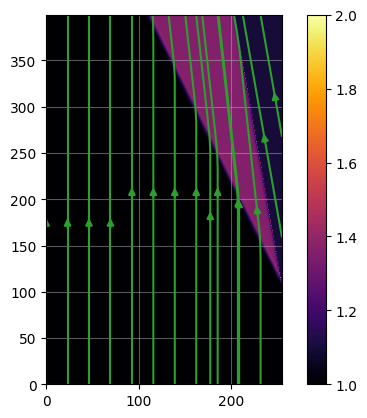

In [317]:
field = 'rho'
t = ''
data = np.loadtxt('./output' + tag + '/' + field + t + '.txt')
rho = data.copy()
# rho[np.where(bound>0)] = float('nan')
plt.imshow(rho,origin='lower',cmap='inferno',vmax=2,vmin=1)
plt.colorbar()


v = np.loadtxt('./output' + tag + '/v' + t +'.txt')
u = np.loadtxt('./output' + tag + '/u' + t +'.txt')
v[np.where(bound>0)] = float('nan')
u[np.where(bound>0)] = float('nan')
m,n = u.shape
x, y = np.arange(0,n,1), np.arange(0,m,1)
plt.streamplot(x,y,u,v, density=0.4, color='tab:green',broken_streamlines=False)
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.grid(alpha=0.5)



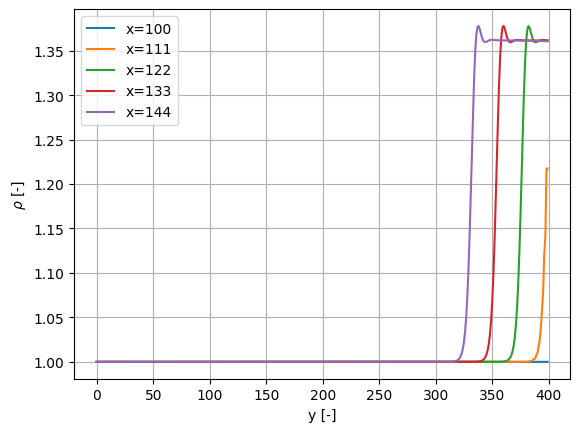

In [318]:
ny, nx = data.shape

xs, ys = [], []

for ii in range(100,150,(nx-20)//20):
    
    rho_out = data[:,ii]
    plt.plot(rho_out,label='x='+str(ii))
    
    xs.append(ii)
    ys.append(np.argmax(rho_out))
    
    

plt.grid()
plt.legend()
plt.xlabel('y [-]')
plt.ylabel('$\\rho$ [-]')

xs = np.asarray(xs)
ys = np.asarray(ys)

shock angle = 30.07 deg


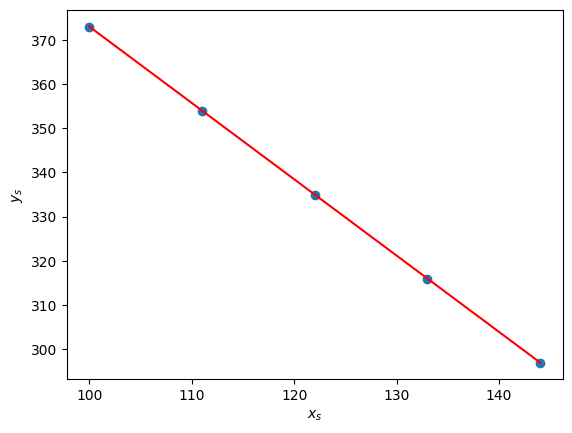

In [304]:
plt.plot(xs,ys,'o')
plt.xlabel('$x_s$')
plt.ylabel('$y_s$')

from scipy.optimize import curve_fit

def fn(x,m,c):
    return m*x + c

popt, pcov = curve_fit(fn, xs, ys)
plt.plot(xs, fn(xs, *popt), 'r-')

angle = np.arctan(popt[0])
print('shock angle = %1.2f deg'%(90+np.rad2deg(angle)))

# Lineout along x

Text(0, 0.5, '$\\rho$ [-]')

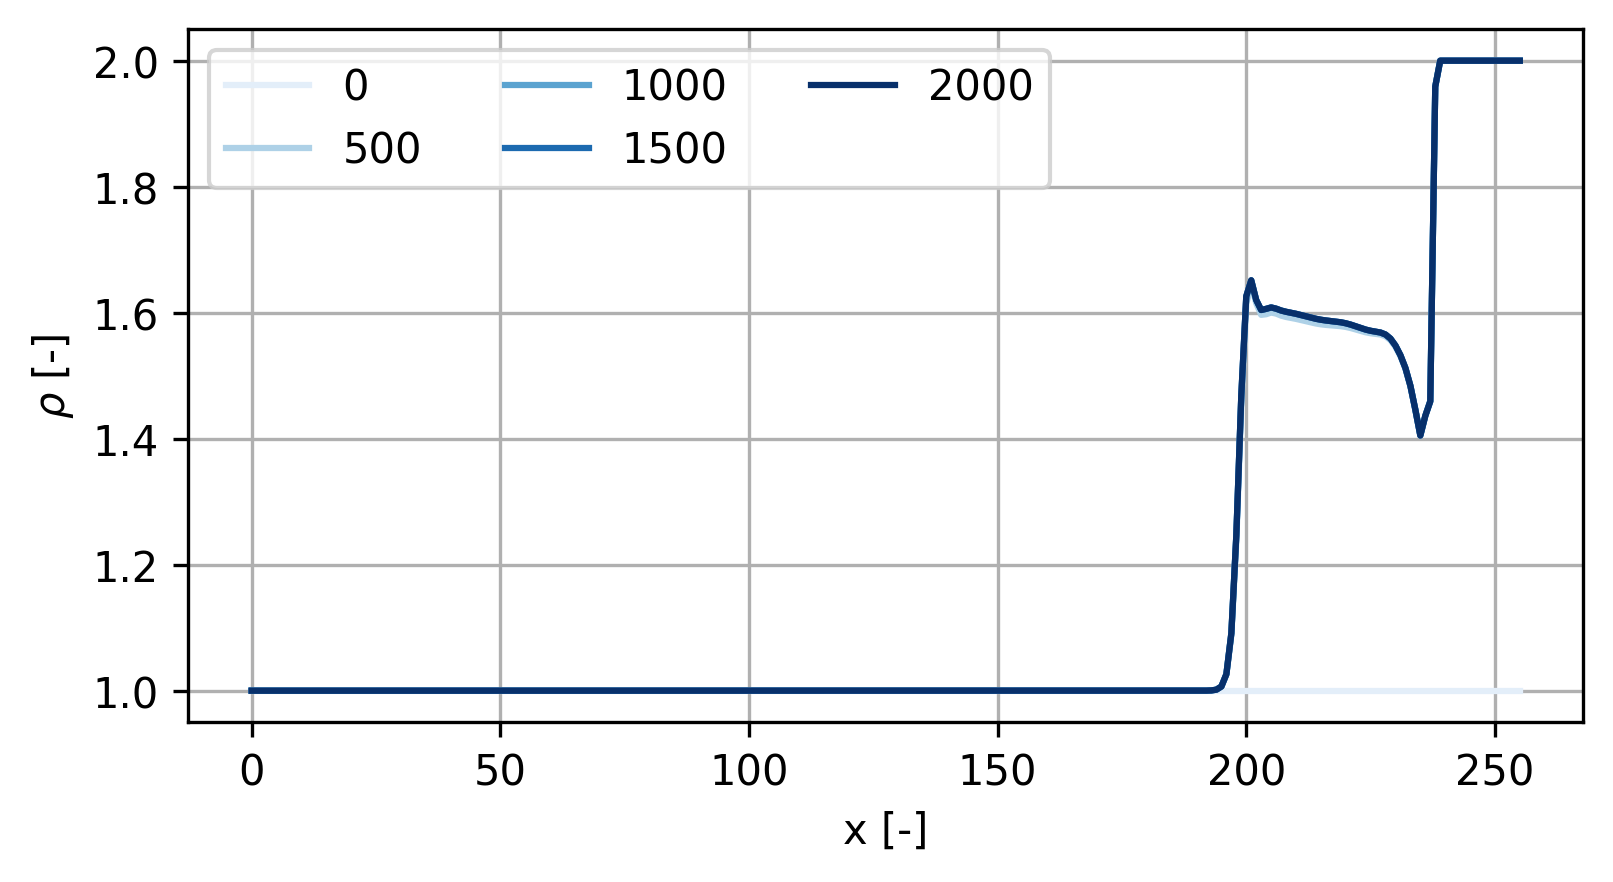

In [308]:
yidx = 200
tidx = np.arange(0,2100,500)
field = 'rho'
colors = plt.cm.Blues(np.linspace(0.1,1,tidx.shape[0]))

fig, axs = plt.subplots(1,1,figsize=(6,3),dpi=300)
for ii in range(tidx.shape[0]):
    data = np.loadtxt('./output' + tag + '/' + field + '-' + str(tidx[ii]) + '.txt')
#     data[np.where(bound>0)] = float('nan')
    axs.plot(data[yidx,:],label=str(tidx[ii]),color=colors[ii])
axs.legend(ncol=3)
axs.grid()
axs.set_xlabel('x [-]')
# axs.set_ylim([1,3])
axs.set_ylabel('$\\rho$ [-]')

Text(0, 0.5, 'p [-]')

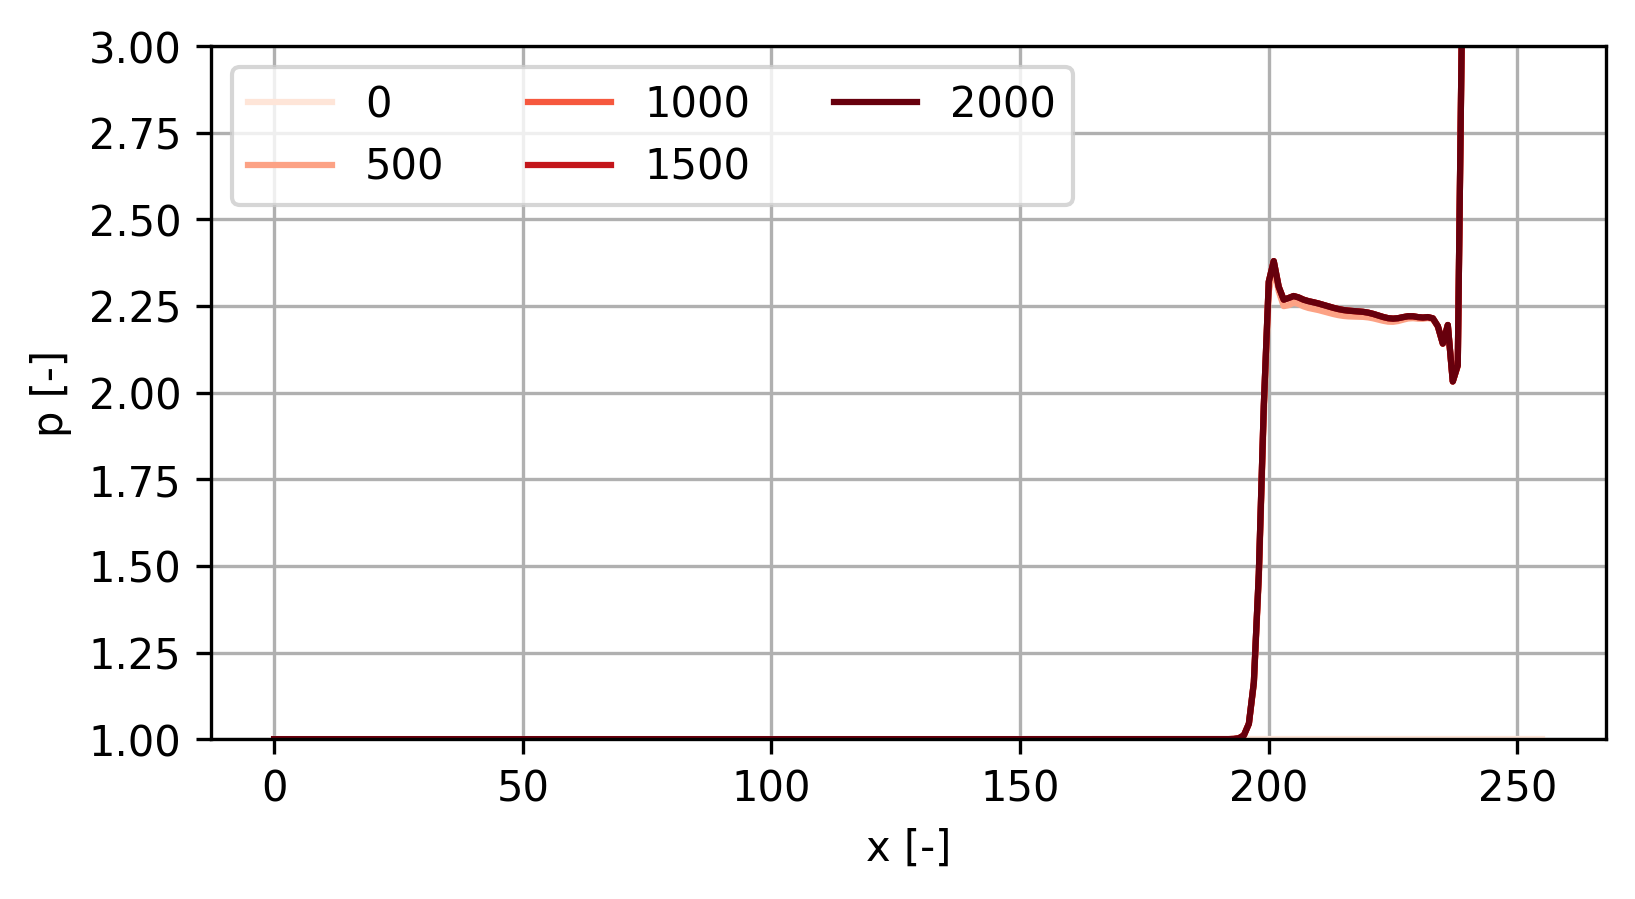

In [309]:

field = 'p'
colors = plt.cm.Reds(np.linspace(0.1,1,tidx.shape[0]))

fig, axs = plt.subplots(1,1,figsize=(6,3),dpi=300)
for ii in range(tidx.shape[0]):
    data = np.loadtxt('./output' + tag + '/' + field + '-' + str(tidx[ii]) + '.txt')
    data[np.where(bound>0)] = float('nan')
    axs.plot(data[yidx,:],label=str(tidx[ii]),color=colors[ii])
axs.legend(ncol=3)
axs.grid()
axs.set_xlabel('x [-]')
axs.set_ylim([1,3])
axs.set_ylabel('p [-]')

# show pressure jump

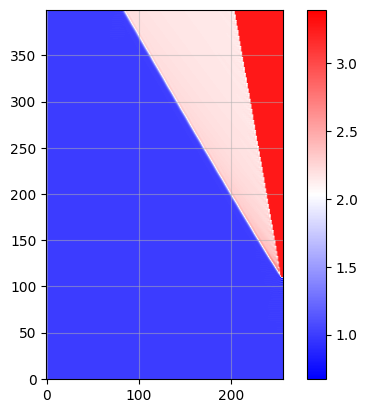

In [310]:
field = 'p'
p = np.loadtxt('./output' + tag + '/' + field + t + '.txt')
p[np.where(bound>0)] = float('nan')
plt.imshow(p,origin='lower',cmap='bwr')
plt.colorbar()
plt.grid(alpha=0.5)

Text(0, 0.5, '$p$ [-]')

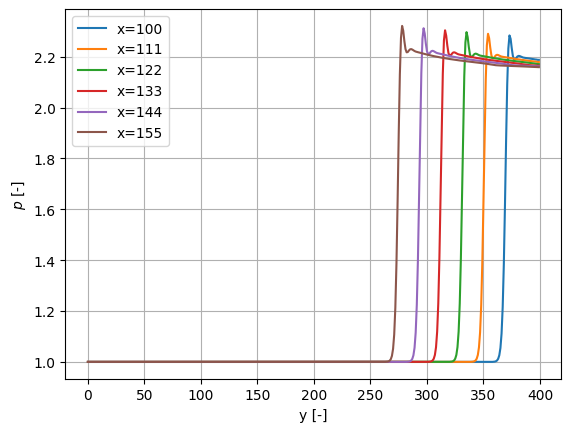

In [311]:
ny, nx = data.shape

for ii in range(100,160,(nx-20)//20):

    plt.plot(p[:,ii],label='x='+str(ii))

plt.grid()
plt.legend()
plt.xlabel('y [-]')
plt.ylabel('$p$ [-]')

# Analytical Result

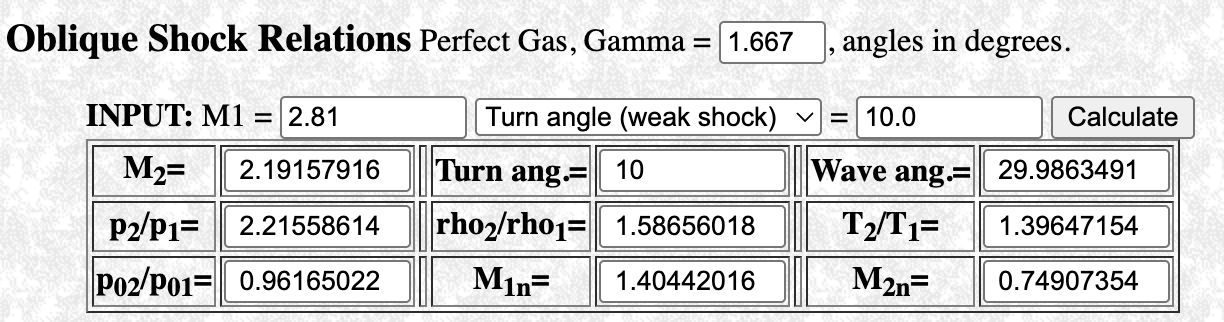

In [154]:
A = -2.0
alpha = 2
beta = 0.5
pressure = 2.2
density = 1.6
T = pressure * 1.0 / density
q = A * density * (density**alpha) * (T**beta)
tau = pressure / (1.667 -1) / q
print('cooling time = ', abs(tau))

cooling time =  0.3433646282198326
